In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim
#import re, string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [2]:
IMDB = pd.read_csv('IMDB Dataset.csv')

In [3]:
with open('positive-words.txt') as f:
    g_lines = f.readlines()
    good = []
    for l in g_lines:
        good_list = l.split('\n')
        good.append(good_list[0]) #list of the positive words
        
    print(good)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [4]:
with open('negative-words.txt') as g:
    b_lines = g.readlines()
    bad = []
    for l in b_lines:
        bad_list = l.split('\n')
        bad.append(bad_list[0]) #list of the negative words
        
    print(bad)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [5]:
IMDB.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Descriptive Statistics ##

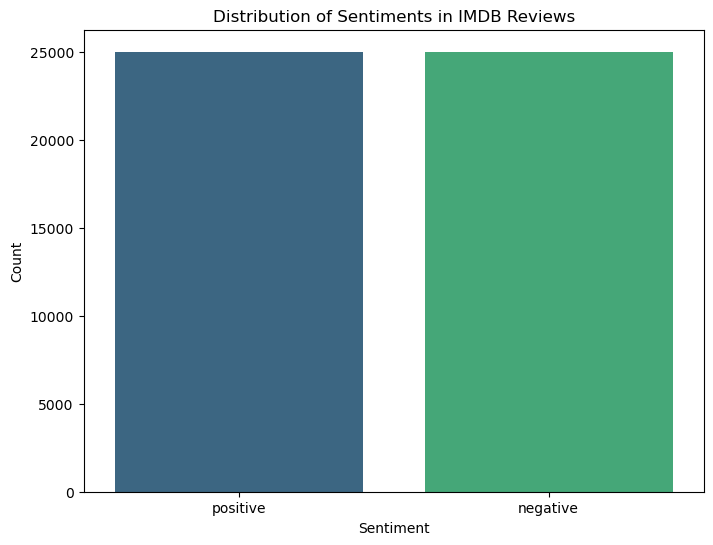

In [6]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=IMDB, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in IMDB Reviews')

# Show the plot
plt.show()

From the bar chart we can see that there are 50,000 reviews with an equal amount of positive and negative reviews.

In [7]:
IMDB['sentiment'] = IMDB['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
IMDB.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [9]:
X = IMDB['review']
y = IMDB['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=9)

In [10]:
y_train


30309    0
48725    1
14609    0
11364    1
11850    1
        ..
5014     1
42747    1
22584    1
501      1
20828    0
Name: sentiment, Length: 40000, dtype: int64

In [11]:
y_test.value_counts()

sentiment
0    5023
1    4977
Name: count, dtype: int64

In [32]:
from collections import Counter


import spacy
import re, string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer
    

def process_string(review):
  # 1. Remove tags (things like <...>)
    review = re.sub(r'<.*?>', '', review)

    # 2. Remove punctuation and make all letters lowercase
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove duplicate spaces, e.g., '     ' -> ' '
    review = ' '.join(review.split())
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    review = ' '.join(word for word in review.split() if word not in stop_words)
    
    ## 5. Lemmatize (coverts to base word)
    doc = nlp(review)
    lemmatized_tokens = [token.lemma_ for token in doc]
    review = ' '.join(lemmatized_tokens)

    # 6. Check if it's an adverb and convert to adjective (assuming adverb w/ -ly ending has length >= 4)
    adverb_pattern = re.compile(r'\b(\w+ly)\b', flags=re.IGNORECASE)
    review = adverb_pattern.sub(lambda match: match.group(1)[:-2] if len(match.group(1)[:-2]) >= 4 else match.group(1),review)    
    
    
     # TF-IDF Integration within the function
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([review])
    feature_names = vectorizer.get_feature_names_out()

    tfidf_dict = dict(zip(feature_names, tfidf_matrix.toarray().flatten()))

    # Print TF-IDF scores for words in the review
    print("TF-IDF Scores:")
    for word, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{word}: {score}")

    # Print TF-IDF scores for words in the review
    print("TF-IDF Scores:")
    for word, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{word}: {score}")

    #Multiplier assigns weight to value in each array (words in good array should go from most indicative of good review --> least indicative)
    
#     good_multiplier = [1/(i+1) if i != 0 else 1 for i in range(len(good))]
#     bad_multiplier = [1/i if i != 0 else 0 for i in range(len(bad))]    
    bad_count_total = 0
    good_count_total = 0
    bad_counts_word = Counter()
    good_counts_word = Counter()

    #Without printing anything, it auto prints 0 or 1 for the counter (something's off)
    
    for word in review.split():
        if any(bad_word in word.lower() for bad_word in bad):
            bad_count_total += 1
            bad_counts_word[word] += 1
        elif any(good_word in word.lower() for good_word in good):
            good_count_total +=1
            good_counts_word[word] += 1
    print("List of bad words:", bad_counts_word)
    print("List of good words:", good_counts_word)
    print("Bad", bad_count_total)
    print("Good", good_count_total)
     
    
    return review



# demo
print("Example of a preprocessed text:")
print(x_train[90])
print(y_train[90])
print(process_string(x_train[90]))





Example of a preprocessed text:
"Down Periscope" has been in our library since it first arrived in VHS. Since then, we have acquired the DVD and a digital from Cinema Now.<br /><br />It is a quirky flick that does not go militarily overboard as either pro or con. It is first and foremost a comedy and as a vehicle for the main characters, I am quite surprised that a sequel has never been offered.<br /><br />The movie has gained a following that borders on a cult obsession, even among the very young. I became aware of this while visiting the USS Drum in Mobile, Alabama in 2002. A group of Cub Scouts, my grandson among them, had all taken up the roles from the movie and planned to relive it during their overnighter on board.<br /><br />It is a fun romp that makes you proud both of our Navy and Hollywood... which is rare company.<br /><br />Thanks to Kelsey Grammar, Lauren Holly and Rob Schneider for making what could have been an otherwise unremarkable movie, such great entertainment!
1
T

In [13]:
#X_train = x_train.apply(process_string)
#X_test = x_test.apply(process_string)

In [14]:
#count_vect = CountVectorizer(min_df=5)
#X_train_counts = count_vect.fit_transform(X_train)
#X_test_counts = count_vect.transform(X_test)

#print("Train shape:", X_train_counts.shape, "Test shape:", X_test_counts.shape)

In [15]:
#nltk.download()

['This', 'is', 'a', 'sample', 'review.']
